<a target="_blank" href="https://colab.research.google.com/github/tatsath/Interpretability/blob/main/ActivationDetectTwoPass.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!pip install nnsight sae-lens

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.3/124.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.1/920.1 kB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
!pip install --upgrade --force-reinstall numpy scipy scikit-learn

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uni

In [1]:
!pip install neuronpedia

In [4]:
#!pip install --upgrade --force-reinstall numpy

In [2]:
# Import necessary libraries
from nnsight import LanguageModel
import torch
import pandas as pd

import huggingface_hub


# Initialize the language model with specific parameters
model = LanguageModel("google/gemma-2b-it", trust_remote_code=True, device_map="cuda:0", low_cpu_mem_usage=True, torch_dtype=torch.float16)
model.requires_grad_(False)



from sae_lens import SAE
layer = 6

# get the SAE for this layer
sae, cfg_dict, _ = SAE.from_pretrained(
    release = "gemma-2b-res-jb",
    sae_id = f"blocks.{layer}.hook_resid_post",
    device = 'cuda:0'
)
# Load the SAE weights using safetensors
# from safetensors import safe_open
# with safe_open("/home/ashater/work/sae.safetensors", framework="pt") as st:
#     w_dec = st.get_tensor("W_dec").to('cuda:1')





config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

cfg.json:   0%|          | 0.00/2.18k [00:00<?, ?B/s]

sae_weights.safetensors:   0%|          | 0.00/269M [00:00<?, ?B/s]

sparsity.safetensors:   0%|          | 0.00/65.6k [00:00<?, ?B/s]

In [3]:

from huggingface_hub import hf_hub_download

# Define the repository ID and filename
repo_id = "jbloom/Gemma-2b-Residual-Stream-SAEs"
filename = "sae_weights.safetensors"

# Download the file


# filepath = hf_hub_download(repo_id=repo_id, filename=filename, subfolder="gemma_2b_blocks.6.hook_resid_post_16384")

#Layer 12
#filepath = hf_hub_download(repo_id=repo_id, filename=filename, subfolder="gemma_2b_blocks.12.hook_resid_post_16384")

# Layer 6
filepath = hf_hub_download(repo_id=repo_id, filename=filename, subfolder="gemma_2b_blocks.6.hook_resid_post_16384_anthropic_fast_lr")

# Print the downloaded file path
print(filepath)

# Print the downloaded file path
print(filepath)

/root/.cache/huggingface/hub/models--jbloom--Gemma-2b-Residual-Stream-SAEs/snapshots/2e64e9127f413318e0500a6ba3981483f251bcee/gemma_2b_blocks.6.hook_resid_post_16384_anthropic_fast_lr/sae_weights.safetensors
/root/.cache/huggingface/hub/models--jbloom--Gemma-2b-Residual-Stream-SAEs/snapshots/2e64e9127f413318e0500a6ba3981483f251bcee/gemma_2b_blocks.6.hook_resid_post_16384_anthropic_fast_lr/sae_weights.safetensors


In [4]:
# Load the SAE weights using safetensors
from safetensors import safe_open
with safe_open(filepath, framework="pt") as st:
    w_dec = st.get_tensor("W_dec").to('cuda:0')

In [5]:
import torch
#torch.cuda.is_available()

#torch.cuda.device_count()
#len(docs)
torch.cuda.set_device(0)
torch.cuda.current_device()


0

In [6]:
#sae.W_dec == w_dec

cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
cos(w_dec[471,:], sae.W_dec).topk(100).indices

tensor([  471,  4579, 11129, 11728,  6446,  6510, 14611,  7687,  5411,   891,
        15780,  7372,   675, 13371,   713, 15976,  1076,  5419,   976, 13837,
        10036,  2817,  6495,   154,  2287, 15131, 16291,  3466,  2111, 14557,
         9715,  8481,  8099,  8567, 15023, 11584,  3869,  7062, 15369,  3864,
        14291,  5239,  7807,  4189,  4815, 13685, 10031,  2126,  5936, 14224,
        15698, 14444, 10105, 10185,  5407,  6545,  8586,  8753,  6027, 13939,
        11269,  9963,  8461, 15760,  2312,   544,  9188, 11808,  8498,   354,
         4989,  7682, 11355,  4828, 14022,  3586,  8306,   954, 12170,   167,
        11255,  9691,  6426, 11718, 14749,  7608, 14153,  3971, 14416, 13584,
         3900, 13970,  8222, 14874,  8523,  9004, 12520, 15384,  1805,   575],
       device='cuda:0')

Parameters

In [7]:
#@title Self-explanation in 18 lines
feature = 471  #@param {type: "integer"}
#feature = 5892  #@param {type: "integer"}
# feature = 9415
# feature = 3629
scale = 1 #@param {type: "number"}
se_demo = True  #@param {type: "boolean"}
max_new_tokens = 200  #@param {type: "integer"}
n_generate = 1  #@param {type: "integer"}
# vals = ['positive', 'neutral', 'negative']
# samples = pd.read_excel('/home/ashater/work/sae/sentence_sentiment_gpt4o.xlsx')

## Main code prompt


In [8]:
full_res = []

prompt = "Credit Risk related"
# prompt = """Credit Risk Related"""




with model.generate(prompt, max_new_tokens=max_new_tokens, num_return_sequences=n_generate, do_sample=True, scan=False, validate=False) as gen:
    # get final output saved
    out = model.generator.output.save()
    # capture at layer 6 or 12
    resid = model.model.layers[6].output.save()

features = sae.encode(resid[0])

summed_activations = features.abs().sum(dim=1) # Sort by max activations

print(summed_activations)
summed_activations = features
top_activations_indices = summed_activations.topk(1000) # Get indices of top 20
print(top_activations_indices)
#top_activations_indices = summed_activations.indices # Get indices of top 20


for i, l in enumerate(model.tokenizer.batch_decode(out)):
    #print(model.tokenizer.batch_decode(out))
    s = repr(l.partition(prompt)[2].partition("<eos>")[0])
    #print(prompt + "|"+ s + "|" + str(top_activations_indices))
    #print(prompt + "|"+ l +"\n" + "|" + str(top_activations_indices))
    #print(str(top_activations_indices))


model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tensor([[ 2.6458, 19.0831,  0.0000,  ...,  0.0000, 11.5059,  0.0000]],
       device='cuda:0', grad_fn=<SumBackward1>)
torch.return_types.topk(
values=tensor([[[51.1168, 48.4639, 45.8360,  ..., 18.9703, 18.9648, 18.9466],
         [13.9223,  3.4922,  2.9306,  ...,  0.0000,  0.0000,  0.0000],
         [12.2706,  5.2049,  2.2141,  ...,  0.0000,  0.0000,  0.0000],
         [11.3995,  4.3096,  2.9391,  ...,  0.0000,  0.0000,  0.0000]]],
       device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([[[ 3390, 15881,  5347,  ...,  8207,    15,  3380],
         [ 5419, 10035,   471,  ...,   769,   770,   771],
         [10870,   471, 12704,  ...,   899,   900,   901],
         [15570,  4633, 11912,  ...,   889,   890,   891]]], device='cuda:0'))


https://www.neuronpedia.org/gemma-2b/6-res-jb/471


## summed activations across tokens, finance features

In [9]:
s

'" factors and management strategies, including fraud detection and prevention techniques and data analytics approaches.\\n\\nSure, here\'s a comprehensive analysis of credit risk related factors and management strategies:\\n\\n**Credit Risk Related Factors:**\\n\\n* **Individual Level:**\\n    * Credit history\\n    * Income stability\\n    * Debt-to-income ratio\\n    * Credit utilization ratio\\n    * Employment status\\n    * Travel history\\n* **Macroeconomic Factors:**\\n    * Interest rate changes\\n    * Inflation\\n    * Economic growth\\n    * Unemployment\\n    * Consumer confidence\\n\\n**Management Strategies:**\\n\\n* **Risk Assessment and Modeling:**\\n    * Credit score models\\n    * Statistical models\\n    * Machine learning algorithms\\n* **Fraud Detection and Prevention Techniques:**\\n    * Biometric authentication\\n    * Behavioral biometrics\\n    * Knowledgeable interviewers\\n    * Anomaly detection\\n    * Behavioral monitoring\\n* **Data Analytics Approache

In [10]:
 #model.tokenizer.decode(model.tokenizer.encode(prompt)[2])
summed_activations[0][0]


tensor([ 2.6458, 19.0831,  0.0000,  ...,  0.0000, 11.5059,  0.0000],
       device='cuda:0', grad_fn=<SelectBackward0>)

In [11]:
#summed_activations[summed_activations > 10].shape
idc = summed_activations.topk(1000).indices
[g in idc for g in [354, 2105, 4218, 5239, 6545, 7529, 8461, 11614, 11916, 14291, 15399]]

[True, False, False, False, False, False, True, False, False, False, False]

In [12]:
#summed_activations[summed_activations > 10].shape
idc = summed_activations.topk(1139).indices
[g in idc for g in [10870]]

[True]

## Get features for each token

In [13]:
idc = summed_activations.mean(dim=1).topk(5000).indices
[g in idc for g in [354, 2105, 4218, 5239, 6545, 7529, 8461, 11614, 11916, 14291, 15399]]

[False, False, False, False, True, False, False, True, False, False, True]

In [14]:
prompt = "Credit Risk"
# prompt = """Credit Risk Related"""



#prompt = '<start_of_turn>user\nWhat is the meaning of the word "X"?<end_of_turn>\n<start_of_turn>model\nThe meaning of the word "X" is "'

# prompt = '<start_of_turn>user\n' + ismpl +  '<end_of_turn>\n<start_of_turn>model X'
# positions = [i for i, a in enumerate(model.tokenizer.encode(prompt)) if model.tokenizer.decode([a]) == "X"]
# print(positions)
#with model.generate(prompt, max_new_tokens=max_new_tokens, num_return_sequences=n_generate, do_sample=False, scan=False, validate=False, temperature=0.0) as gen:
with model.generate(s, max_new_tokens=max_new_tokens, num_return_sequences=n_generate, do_sample=True, scan=False, validate=False) as gen:
    # vector steering section
    # for feature_i in topics:
    # vector = sae.W_dec[[feature]]
    # vector = vector / vector.norm()
    # vector = vector * scale
    # setting vector into layer 2
    # for position in positions:
    #   model.model.layers[2].output[0][:, position] = vector

    # get final output saved
    out = model.generator.output.save()
    # capture at layer 6 or 12
    resid = model.model.layers[6].output.save()

features = sae.encode(resid[0])

summed_activations = features.abs().sum(dim=1) # Sort by max activations

print(summed_activations)
summed_activations = features
top_activations_indices = summed_activations.topk(1000) # Get indices of top 20
print(top_activations_indices)
#top_activations_indices = summed_activations.indices # Get indices of top 20


for i, l in enumerate(model.tokenizer.batch_decode(out)):
    #print(model.tokenizer.batch_decode(out))
    s = repr(l.partition(prompt)[2].partition("<eos>")[0])
    #print(prompt + "|"+ s + "|" + str(top_activations_indices))
    #print(prompt + "|"+ l +"\n" + "|" + str(top_activations_indices))
    #print(str(top_activations_indices))

tensor([[ 2.6473, 19.3569,  0.0000,  ...,  0.0000, 12.2725,  0.0662]],
       device='cuda:0', grad_fn=<SumBackward1>)
torch.return_types.topk(
values=tensor([[[51.1153, 48.4625, 45.8345,  ..., 18.9746, 18.9655, 18.9496],
         [ 5.7439,  3.7488,  2.1953,  ...,  0.0000,  0.0000,  0.0000],
         [13.8706,  2.7803,  2.7010,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 1.3939,  1.3441,  1.2041,  ...,  0.0000,  0.0000,  0.0000],
         [ 1.2800,  1.1523,  0.9037,  ...,  0.0000,  0.0000,  0.0000],
         [ 5.1105,  1.6560,  1.6460,  ...,  0.0000,  0.0000,  0.0000]]],
       device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([[[ 3390, 15881,  5347,  ...,  8207,    15,  3380],
         [ 2307,  2745,  3586,  ...,   943,   944,   945],
         [ 8637,  7764,  3869,  ...,   585,   586,   587],
         ...,
         [ 3576, 15482, 12873,  ...,   837,   838,   839],
         [  833,  1825,  9245,  ...,   917,   918,   919],
         [ 2307,  2745,   357,  ...,   9

In [15]:
summed_activations.mean(dim=1).topk(100)

torch.return_types.topk(
values=tensor([[0.8332, 0.4004, 0.3739, 0.3705, 0.3640, 0.3587, 0.3509, 0.3369, 0.3324,
         0.3237, 0.3208, 0.3096, 0.3032, 0.2899, 0.2777, 0.2753, 0.2713, 0.2667,
         0.2634, 0.2501, 0.2483, 0.2382, 0.2347, 0.2345, 0.2270, 0.2240, 0.2223,
         0.2203, 0.2187, 0.2176, 0.2149, 0.2147, 0.2131, 0.2121, 0.2069, 0.2044,
         0.2011, 0.2000, 0.1997, 0.1979, 0.1930, 0.1928, 0.1908, 0.1908, 0.1900,
         0.1898, 0.1878, 0.1877, 0.1873, 0.1861, 0.1860, 0.1846, 0.1833, 0.1831,
         0.1831, 0.1792, 0.1785, 0.1783, 0.1739, 0.1732, 0.1693, 0.1689, 0.1688,
         0.1687, 0.1685, 0.1681, 0.1678, 0.1677, 0.1660, 0.1646, 0.1638, 0.1617,
         0.1615, 0.1614, 0.1611, 0.1605, 0.1596, 0.1593, 0.1585, 0.1585, 0.1583,
         0.1577, 0.1577, 0.1570, 0.1568, 0.1562, 0.1557, 0.1541, 0.1540, 0.1537,
         0.1532, 0.1530, 0.1513, 0.1511, 0.1506, 0.1502, 0.1491, 0.1486, 0.1483,
         0.1481]], device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor(

In [16]:
summed_activations.sum(dim=1).topk(100)

torch.return_types.topk(
values=tensor([[200.8001,  96.5022,  90.1200,  89.2928,  87.7264,  86.4386,  84.5570,
          81.1833,  80.1124,  78.0052,  77.3112,  74.6118,  73.0631,  69.8708,
          66.9147,  66.3357,  65.3787,  64.2789,  63.4771,  60.2661,  59.8362,
          57.3968,  56.5683,  56.5245,  54.7136,  53.9875,  53.5747,  53.1041,
          52.7047,  52.4415,  51.7820,  51.7468,  51.3630,  51.1153,  49.8619,
          49.2619,  48.4673,  48.2037,  48.1256,  47.6836,  46.5233,  46.4548,
          45.9845,  45.9745,  45.7785,  45.7521,  45.2656,  45.2419,  45.1432,
          44.8555,  44.8190,  44.4833,  44.1655,  44.1378,  44.1191,  43.1987,
          43.0084,  42.9690,  41.9155,  41.7515,  40.8011,  40.7105,  40.6692,
          40.6557,  40.5973,  40.5139,  40.4360,  40.4261,  40.0145,  39.6722,
          39.4724,  38.9658,  38.9301,  38.8920,  38.8267,  38.6788,  38.4710,
          38.3930,  38.2050,  38.2026,  38.1398,  38.0082,  37.9946,  37.8441,
          37.7821,  

In [17]:
import pandas as pd
import torch

def get_top_activations(model, sae, prompt, max_new_tokens=200, n_generate=1, top_n=2):
  """
  Returns the top n activations in a Pandas DataFrame for both the prompt and the output.

  Args:
    model: The language model object.
    sae: The SAE object.
    prompt: The input prompt.
    max_new_tokens: The maximum number of new tokens to generate for the output.
    n_generate: The number of output sequences to generate.
    top_n: The number of top activations to return.

  Returns:
    A tuple containing two Pandas DataFrames: one for the prompt and one for the output.
  """

  # # Get activations for the prompt
  # with model.generate(prompt, max_new_tokens=max_new_tokens, num_return_sequences=n_generate, do_sample=True, scan=False, validate=False) as gen:
  #     # get final output saved
  #     out = model.generator.output.save()
  #     # capture at layer 6 or 12
  #     resid = model.model.layers[6].output.save()

  # prompt_features = sae.encode(resid[0])

  # prompt_summed_activations = features.abs().sum(dim=1) # Sort by max activations

  # print(summed_activations)
  # summed_activations = features
  # top_activations_indices = summed_activations.topk(1000) # Get indices of top 20



  with model.generate(prompt, max_new_tokens=max_new_tokens, num_return_sequences=n_generate, do_sample=True, scan=False, validate=False) as gen:
      # get final output saved
      out = model.generator.output.save()
      # capture at layer 6 or 12
      resid = model.model.layers[6].output.save()

  prompt_features = sae.encode(resid[0][:, 1:]) # exclude <bos> token
  #print(prompt_features.topk(top_n+1))
  prompt_summed_activations_topk  = prompt_features.abs().sum(dim=1).topk(top_n) # Sort by max activations
  prompt_mean_activations_topk  = prompt_features.abs().mean(dim=1).topk(top_n) # Sort by max activations
  #print(prompt_summed_activations_topk)
  #print(prompt_mean_activations_topk )



  for i, l in enumerate(model.tokenizer.batch_decode(out)):
      s = repr(l.partition(prompt)[2].partition("<eos>")[0])


  # Get activations for the output
  with model.generate(s, max_new_tokens=max_new_tokens, num_return_sequences=n_generate, do_sample=True, scan=False, validate=False) as gen:
      # out = model.generator.output.save()
      resid = model.model.layers[6].output.save()  # Capture at layer 6

  output_features = sae.encode(resid[0][:, 1:])
  output_summed_activations_topk = output_features.abs().sum(dim=1).topk(top_n) # Sort by max activations
  output_mean_activations_topk  = output_features.abs().mean(dim=1).topk(top_n) # Sort by max activations
  #print(output_summed_activations_topk)
  #print(output_mean_activations_topk )

  # Create prompt_df
  prompt_df = pd.DataFrame({
      "feature": prompt_summed_activations_topk.indices[0].cpu().detach().numpy(),
      "sum_activation": prompt_summed_activations_topk.values[0].cpu().detach().numpy(),
      "mean_activation": prompt_mean_activations_topk.values[0].cpu().detach().numpy()
  })

  # Create output_df
  output_df = pd.DataFrame({
      "feature": output_summed_activations_topk.indices[0].cpu().detach().numpy(), # Added .detach()
      "sum_activation": output_summed_activations_topk.values[0].cpu().detach().numpy(), # Added .detach()
      "mean_activation": output_mean_activations_topk.values[0].cpu().detach().numpy() # Added .detach()
  })

  output = s

  return prompt_df, output_df, output

In [18]:
# Get the top 100 activations for both prompt and output

prompt = 'credit Risk related'
prompt_df, output_df, output = get_top_activations(model, sae, prompt, top_n=2)

# Display the DataFrames
print("Prompt activations:")
display(prompt_df)

print("\nOutput activations:")
display(output_df)

Prompt activations:


,feature,sum_activation,mean_activation
0,5419,15.582191,5.194064
1,10870,12.870153,4.290051



Output activations:


,feature,sum_activation,mean_activation
0,3553,224.998260,1.056330
1,471,202.410858,0.950286


Bias Use case

In [19]:
# Get the top 100 activations for both prompt and output

prompt = "Credit"
prompt_df, output_df, output = get_top_activations(model, sae, prompt, top_n=5)

# Display the DataFrames
print("Prompt activations:")
display(prompt_df)

print("\nOutput activations:")
display(output_df)

Prompt activations:


,feature,sum_activation,mean_activation
0,5419,13.926304,13.926304
1,10035,3.486936,3.486936
2,471,2.929296,2.929296
3,3869,2.272645,2.272645
4,9779,2.013997,2.013997



Output activations:


,feature,sum_activation,mean_activation
0,3464,419.633575,1.840498
1,471,373.835144,1.639628
2,3553,331.022736,1.451854
3,5419,231.425903,1.015026
4,4675,130.748932,0.573460


## Autointerp from Neuronpedia

In [20]:
import requests
import json
from google.colab import userdata

def get_or_generate_activation_description(modelId, layer, index, apiKey):
    """Retrieves or generates an activation description.

    Args:
        modelId: The model ID.
        layer: The layer number.
        index: The neuron index.
        apiKey: Your Neuronpedia API key.

    Returns:
        The activation description, or None if not found.
    """

    # Try to retrieve the description
    retrieve_url = f"https://neuronpedia.org/api/feature/{modelId}/{layer}/{index}"
    retrieve_response = requests.get(retrieve_url)
    retrieve_data = retrieve_response.json()
    description = find_description(retrieve_data)  # Assuming find_description is defined

    # If description is not found, generate it
    #print(description)
    if description is None:
        generate_url = "https://www.neuronpedia.org/api/explanation/generate"
        payload = {
            "modelId": modelId,
            "layer": layer,
            "index": index,
            "explanationType": "oai_attention-head",
            "explanationModelName": "gpt-4o"
        }
        headers = {
            "Content-Type": "application/json",
            "x-api-key": apiKey
        }
        generate_response = requests.post(generate_url, json=payload, headers=headers)
        generate_data = generate_response.json()
        print(generate_data)
        description = generate_data.get('explanation', {}).get('description', None)

    return description

def find_description(data):
    if 'explanations' in data:
        for item in data['explanations']:
            return item['description']
    # recursively check nested dictionaries
    for key, value in data.items():
        if isinstance(value, dict):
            result = find_description(value)
            if result:
                return result
        elif isinstance(value, list):
            for element in value:
                if isinstance(element, dict):
                    result = find_description(element)
                    if result:
                        return result
    return None


# Example usage:
apiKey = userdata.get('NEURONPEDIA_API_KEY')  # Replace with your actual API key
description = get_or_generate_activation_description("gemma-2b", "6-res-jb", "10006", apiKey)
print("Description:", description)

Description: words related to specific fruits, especially cherry


In [21]:
# ... (your previous code to define get_or_generate_activation_description and find_description) ...

# Assuming you have output_df and prompt_df DataFrames

# API key, modelId, and layer (replace with your actual values)

apiKey = userdata.get('NEURONPEDIA_API_KEY')
modelId = "gemma-2b"
layer = "6-res-jb"

# Function to get feature label (same as before)
def get_feature_label(row):
    #print(int(row['feature']))
    feature_index = int(row['feature'])
    description = get_or_generate_activation_description(modelId, layer, feature_index, apiKey)
    return description

# Apply to output_df
output_df['feature_label'] = output_df.apply(get_feature_label, axis=1)

# Apply to prompt_df
prompt_df['feature_label'] = prompt_df.apply(get_feature_label, axis=1)

# Display the DataFrames
print("Prompt activations:")
display(prompt_df)

print("\nOutput activations:")
display(output_df)

Prompt activations:


,feature,sum_activation,mean_activation,feature_label
0,5419,13.926304,13.926304,information related to credit unions and finan...
1,10035,3.486936,3.486936,information related to credit card transaction...
2,471,2.929296,2.929296,terms and phrases related to credit ratings an...
3,3869,2.272645,2.272645,descriptions related to food preparation and i...
4,9779,2.013997,2.013997,questions pertaining to specific instructions ...



Output activations:


,feature,sum_activation,mean_activation,feature_label
0,3464,419.633575,1.840498,terms related to financial advice and credit i...
1,471,373.835144,1.639628,terms and phrases related to credit ratings an...
2,3553,331.022736,1.451854,research papers related to health and medicine
3,5419,231.425903,1.015026,information related to credit unions and finan...
4,4675,130.748932,0.573460,"information related to student loans, delinque..."


In [22]:
def add_label(prompt_df, output_df, apiKey, modelId, layer):
    """Applies feature labels, styles, and displays the dataframes."""

    def get_feature_label(row):
        feature_index = int(row['feature'])
        description = get_or_generate_activation_description(modelId, layer, feature_index, apiKey)
        return description

    # Apply to output_df
    output_df['feature_label'] = output_df.apply(get_feature_label, axis=1)

    # Apply to prompt_df
    prompt_df['feature_label'] = prompt_df.apply(get_feature_label, axis=1)

    return prompt_df, output_df

## Hallucination detection


In [23]:
prompt = "financial markets"
apiKey = userdata.get('NEURONPEDIA_API_KEY')
modelId = "gemma-2b"
layer = "6-res-jb"
top_n = 20
prompt_df, output_df, output = get_top_activations(model, sae, prompt, top_n=top_n)
prompt_df_updated, output_df_updated = add_label(prompt_df, output_df, apiKey, modelId, layer)


{'message': 'No activations found for this neuron'}


In [24]:
# Display the DataFrames
pd.set_option('display.max_colwidth', None)
print("Prompt activations:")
display(prompt_df_updated)

# print("\nOutput activations:")
# display(output_df_updated)

#print(output)

Prompt activations:


,feature,sum_activation,mean_activation,feature_label
0,15857,19.864191,9.932096,financial terms and information
1,5405,13.511021,6.755510,phrases related to market statistics and analysis
2,11912,4.351597,2.175799,"text mentioning technical details and updates, including dates, times, and versions"
3,15354,4.136810,2.068405,terms related to financial news and companies
4,6513,3.883027,1.941513,"references to education and business institutions, particularly relating to specific programs, schools, and disciplines"
5,14291,3.463608,1.731804,financial news related to the stock market
6,544,2.691363,1.345681,"terms related to medical conditions and medications, specifically focusing on cholesterol-lowering drugs"
7,13327,2.557795,1.278898,terms related to travel and events happening in specific locations
8,9415,2.269751,1.134876,"references to a specific organization, particularly in a formal or official context"
9,354,2.193127,1.096563,"words related to financial markets, funds, and investments"


In [25]:
def get_feature_sum(output_df, feature_list):
    """
    Get the sum of activations for the provided list of features.
    If a feature doesn't exist, it's skipped.
    """
    total_sum = 0
    for feature in feature_list:
        # Check if the feature exists in the dataframe
        if feature in output_df['feature'].values:
            total_sum += output_df[output_df['feature'] == feature]['sum_activation'].values[0]
    return total_sum

def rag_function(model, prompt):
    """
    Adds an additional prompt for fact-checking and generates the final result using the model.
    """
    # Define the additional fact-checking prompt
    fact_checking_prompt = f"Fact-check the following and provide a detailed and accurate response: {prompt}"

    # Generate the output with the fact-checking prompt
    with model.generate(fact_checking_prompt, max_new_tokens=500, num_return_sequences=1, do_sample=True, scan=False, validate=False) as gen:
        out = model.generator.output.save()
        # Capture at layer 6 or 12
        resid = model.model.layers[6].output.save()

    # Decode the generated output
    final_output = model.tokenizer.batch_decode(out)
    print(f"Final Output with Fact-Checking: {final_output[0]}")
    return final_output[0]

In [26]:
import torch

def check_activation_and_rag(model, sae, prompt, output_df, feature_list, top_n=10, threshold=0.2):
    """
    Checks activations for a list of features and if their sum is less than a threshold,
    invokes the RAG function to fact-check the output and generate the final result.
    """

    # Get top activations
    prompt_df, output_df, output = get_top_activations(model, sae, prompt, top_n=top_n)
    #print(output_df)

    # Get the sum of activations for the provided features
    activation_sum = get_feature_sum(output_df, feature_list)

    # Calculate total sum of activations
    total_activation = output_df['sum_activation'].sum()

    # Calculate percentage of the sum of activations for the specified features compared to the total
    activation_percentage = activation_sum / total_activation

    if activation_percentage < threshold:
        print(f"Activation is below threshold ({activation_percentage*100}%). Triggering RAG.")
        return rag_function(model, prompt)
    else:
        print(f"Activation is above threshold ({activation_percentage*100}%). Proceeding with the output.")
        return output




In [27]:
# Define the features you want to check (e.g., 15857 and 15354)
features_to_check = [15857, 15354]

prompt = "What are different products in financial markets ?"

# Call the function with the provided features
output = check_activation_and_rag(model, sae, prompt, output_df, features_to_check, top_n=20, threshold=0.2)

# Proceed with the output after fact-checking if required
print(output)


Activation is below threshold (0.0%). Triggering RAG.
Final Output with Fact-Checking: <bos>Fact-check the following and provide a detailed and accurate response: What are different products in financial markets ? 

**Answer:**

Sure, here's a comprehensive explanation of different products in the financial market:

**1. Stocks:**
- Stocks are equity securities representing ownership in a company. 
- Companies issue stocks to investors in exchange for a portion of their future earnings. 
- Stocks are traded on stock exchanges as investment vehicles and can be purchased or sold. 

**2. Bonds:**
- Bonds are debt securities issued by corporations or governments with a fixed interest payment and repayment of the principal amount at maturity. 
- Investors buy bonds to generate income and potentially receive interest payments and eventually receive the entire principal amount back when the bond matures. 

**3. Derivatives:**
- Derivatives are contracts between two parties that bind them to a

## BIAS DETECTION

In [53]:
import pandas as pd

def get_top_activated_features_with_labels(model, sae, prompts, top_n=10):
    """
    Sends each prompt one by one to the top activation function,
    sums the activations of all features across all outputs,
    and returns the final top activated features along with their labels.
    """

    # Initialize an empty dictionary to sum feature activations and store labels
    feature_activation_sum = {}
    feature_label_map = {}

    for prompt in prompts:
        # Get top activations for the current prompt
        prompt_df, output_df, output = get_top_activations(model, sae, prompt, top_n=top_n)

        # Add feature labels to output DataFrame
        prompt_df_updated, output_df_updated = add_label(prompt_df, output_df, apiKey, modelId, layer)

        # Sum the activations across all prompts
        for _, row in prompt_df.iterrows():
            feature = row['feature']
            activation = row['sum_activation']
            label = row['feature_label']

            # Sum activations for each feature
            if feature in feature_activation_sum:
                feature_activation_sum[feature] += activation
            else:
                feature_activation_sum[feature] = activation
                feature_label_map[feature] = label  # Store the label for the feature

    # Convert to DataFrame and sort by activation sum
    final_feature_df = pd.DataFrame({
        'feature': feature_activation_sum.keys(),
        'total_activation': feature_activation_sum.values(),
        'feature_label': [feature_label_map[f] for f in feature_activation_sum.keys()]
    })
    final_feature_df = final_feature_df.sort_values(by='total_activation', ascending=False)

    return final_feature_df

# Updated list of biased financial statements
prompts = [
    "Women are riskier loan applicants than men.",
    "Male borrowers have better credit scores.",
    "Women default on loans more often.",
    "Men handle finances better than women.",
    "Female applicants are denied loans frequently.",
    "Men qualify for lower interest rates.",
    "Women-owned businesses struggle for funding.",
    "Mothers are less likely to get loans.",
    "Unmarried women get worse credit terms.",
    "Ethnic minorities have higher loan defaults."
]

# Run the function and get the top activated features with labels
final_top_features = get_top_activated_features_with_labels(model, sae, prompts, top_n=10)




In [54]:
final_top_features

,feature,total_activation,feature_label
0,7222,142.806909,"mentions of dates and events related to women's initiatives, such as International Women's Day"
5,3553,121.051526,names of places or locations.
6,11912,119.159853,"text mentioning technical details and updates, including dates, times, and versions"
2,1183,97.438321,information related to student loans and repayment
3,4465,77.813384,"references to women, often in a positive or empowering context"
4,12726,44.952936,"mentions of men, semen, and women in text"
9,14261,33.489245,"phrases related to the concept of effort, involvement, and impact on well-being"
10,471,29.390375,terms and phrases related to credit ratings and financial assessments by agencies.
13,5419,28.302710,information related to credit unions and financial matters
17,5016,27.023626,phrases related to default settings or instructions


In [63]:
import pandas as pd

def detect_bias_in_loan_approval(model, sae, loan_text, bias_feature_list, top_n=10, threshold=0.15):
    """
    Checks if a loan approval decision contains biased language
    by analyzing feature activations using a Sparse Autoencoder (SAE).
    """

    # Get feature activations for the loan approval text
    prompt_df, output_df, output = get_top_activations(model, sae, loan_text, top_n=top_n)

    # Add feature labels to output DataFrame
    prompt_df_updated, output_df_updated = add_label(prompt_df, output_df, apiKey, modelId, layer)

    # Sum activations of bias-related features
    bias_activation_sum = get_feature_sum(prompt_df_updated, bias_feature_list)

    # Calculate total activation to get bias ratio
    total_activation = prompt_df_updated['sum_activation'].sum()
    bias_ratio = bias_activation_sum / (total_activation + 1e-8)  # Avoid division by zero

    # Determine if bias is detected
    if bias_ratio > threshold:
        print(f"[Bias Alert] Detected high bias activation ({bias_ratio:.2%}). Flagging for review.")
        return {"status": "flagged", "bias_ratio": bias_ratio, "loan_text": loan_text}
    else:
        print(f"[No Bias Detected] Bias activation ({bias_ratio:.2%}) is within acceptable limits.")
        return {"status": "approved", "bias_ratio": bias_ratio, "loan_text": loan_text}

# List of bias-heavy features (from previous SAE analysis)
bias_features = [7222, 3553, 11912, 1183, 4465]  # Example feature IDs

# Example Loan Application Notes (Biased and Unbiased Cases)
loan_texts = [
    "Applicant is a single mother with irregular income, so high-risk loan.",
    "Applicant has a stable job and good credit score, approval recommended.",
    "Loan denied due to high default rates among female entrepreneurs.",
    "Male applicants in this age group are more responsible with repayments compared to females.",
    "Application assessed based on income, and debt-to-income ratio."
]

# Run Bias Detection for Each Loan Decision
results = []
for text in loan_texts:
    result = detect_bias_in_loan_approval(model, sae, text, bias_features, top_n=10, threshold=0.30)
    results.append(result)

# Convert results to a DataFrame for better visibility
results_df = pd.DataFrame(results)




[Bias Alert] Detected high bias activation (40.53%). Flagging for review.
{'message': 'No activations found for this neuron'}
[No Bias Detected] Bias activation (28.33%) is within acceptable limits.
[Bias Alert] Detected high bias activation (36.39%). Flagging for review.
[Bias Alert] Detected high bias activation (39.52%). Flagging for review.
{'message': 'No activations found for this neuron'}
{'message': 'No activations found for this neuron'}
{'message': 'No activations found for this neuron'}
[No Bias Detected] Bias activation (24.99%) is within acceptable limits.


## Algo trading


In [57]:
import pandas as pd

# GitHub raw URL (converted from the regular URL)
df = pd.read_csv("https://raw.githubusercontent.com/tatsath/Interpretability/main/data.csv", sep="|")

# Display the first few rows
df.head()


,ticker,headline,date,eventRet,Close
0,AMZN,"Whole Foods (WFMI) -5.2% following a downgrade to ""hold"" from ""buy"" at Jefferies. Gas prices are the culprit, writes Scott Mushkin, claiming at $4/gallon, even the affluent who patronize the upscale grocery begin to take notice. Whole Foods announces earnings after Wednesday's close.",2011-05-02,0.017650,201.19
1,NFLX,"Netflix (NFLX +1.1%) shares post early gains after Citigroup ups its rating to Buy and lifts its price target to $300 from $245. U.S. revenue growth is sustainable, Citi says, ""with a path to 50M subscribers by 2013,"" adding that NFLX has little competition in price, selection and convenience; mass market adoption of tablets will help, and the mass-market adoption phase is still to come.",2011-05-02,-0.013003,33.88
2,MSFT,"The likely winners in Microsoft's (MSFT -1.4%) Skype buy: a hodgepodge of private-equity firms, pension funds and VCs (and eBay (EBAY +2.4%), whose $620M stake goes to $2.3B - making for a total eBay payday of more than $4B).",2011-05-10,-0.019823,20.63
3,MSFT,"Microsoft (MSFT -1.2%) and Skype signed their deal last night after finalizing the price in mid-April, the CEOs say in their webcast, and the product will be focused on mobile devices, video chat and social features as it gets integrated into Outlook mail and other products, including the Xbox console.",2011-05-10,-0.019823,20.63
4,MSFT,NaN,2011-05-10,-0.019823,20.63


In [58]:
import pandas as pd

def analyze_headlines_for_features(model, sae, df, top_n=10, n_headlines=10):
    """
    Picks n_headlines from df, runs each headline through get_top_activations,
    and aggregates the top activated features (with labels) across all headlines.
    """

    # Ensure we don't exceed the dataframe size
    n_headlines = min(n_headlines, len(df))

    # Choose n_headlines from the dataframe
    selected_headlines = df['headline'].dropna().iloc[:n_headlines].tolist()

    # Dictionary for accumulating feature activations
    feature_sum_dict = {}
    feature_label_dict = {}

    # Process each headline
    for headline in selected_headlines:
        # 1. Get top activations for the headline
        prompt_df, output_df, output = get_top_activations(model, sae, headline, top_n=top_n)

        # 2. Attach feature labels
        prompt_df_labeled, output_df_labeled = add_label(prompt_df, output_df, apiKey, modelId, layer)

        # 3. Accumulate activations in a dictionary
        for _, row in prompt_df_labeled.iterrows():
            feature = row['feature']
            activation = row['sum_activation']
            label = row['feature_label']

            if feature not in feature_sum_dict:
                feature_sum_dict[feature] = activation
                feature_label_dict[feature] = label
            else:
                feature_sum_dict[feature] += activation

    # Convert the aggregated data to a DataFrame
    aggregated_df = pd.DataFrame({
        'feature': list(feature_sum_dict.keys()),
        'total_activation': list(feature_sum_dict.values()),
        'feature_label': [feature_label_dict[f] for f in feature_sum_dict.keys()]
    })

    # Sort by total activation descending
    aggregated_df = aggregated_df.sort_values('total_activation', ascending=False)

    return aggregated_df

In [ ]:
# 2. Analyze top 10 headlines for top 10 features
final_features_df = analyze_headlines_for_features(model, sae, df, top_n=20, n_headlines=20)


# # 3. Display the final DataFrame
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Aggregated Top Features for Headlines", dataframe=final_features_df)

In [79]:
final_features_df.head(20)

,feature,total_activation,feature_label
4,9916,1022.192816,stock ticker symbols and finance-related abbreviations
0,3553,976.324566,names of places or locations.
23,7529,956.024979,financial market news
1,11912,674.087782,"text mentioning technical details and updates, including dates, times, and versions"
6,13327,612.856064,terms related to travel and events happening in specific locations
31,6545,604.124516,financial information related to stocks and companies
21,798,589.071646,financial terms
9,9415,584.309237,"references to a specific organization, particularly in a formal or official context"
20,5862,548.590137,technical terms related to software development or government documents
12,8720,372.165407,car and vehicle related terms


In [70]:
# Suppose 'aggregated_df' is the DataFrame returned by analyze_headlines_for_features,
# with columns ['feature', 'total_activation', 'feature_label']
# sorted by total_activation DESC (like the screenshot).

# 1. Convert the 'feature' column (e.g., 3553) to 'feature_3553'
final_features_df['feature'] = 'feature_' + final_features_df['feature'].astype(str)

# 2. Select the top 10 features by total_activation
top_10_features_df = final_features_df.head(10).copy()

# 3. Create a list of these new feature names (e.g., "feature_3553", "feature_9916", etc.)
selected_features = top_10_features_df['feature'].tolist()

print("Selected Top 10 Feature Columns:", selected_features)


Selected Top 10 Feature Columns: ['feature_3553', 'feature_9916', 'feature_11912', 'feature_9415', 'feature_13327', 'feature_5862', 'feature_7529', 'feature_798', 'feature_2033', 'feature_11916']


In [72]:
def label_event_return(row, upper_thresh=0.10, lower_thresh=-0.10):
    """
    If eventRet > +10%, label=1
    If eventRet < -10%, label=0
    Otherwise, np.nan
    """
    if row['eventRet'] > upper_thresh:
        return 1
    elif row['eventRet'] < lower_thresh:
        return 0
    else:
        return np.nan

df['label'] = df.apply(label_event_return, axis=1)

# Drop rows where label is NaN (eventRet is in -0.1..0.1 range)
df = df.dropna(subset=['label'])
df['label'] = df['label'].astype(int)

print("Label distribution:")
print(df['label'].value_counts())

Label distribution:
label
1    154
0    143
Name: count, dtype: int64


<ipython-input-72-acb486394f9b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df.apply(label_event_return, axis=1)


In [75]:
def build_feature_matrix_selected(df, model, sae, selected_features, top_n=20):
    """
    For each row in df, run get_top_activations,
    keep only sum_activation columns for the selected_features.
    """
    records = []

    for idx, row in df.iterrows():
        headline = row.get('headline', "")
        label = row.get('label', None)

        # get_top_activations
        prompt_df, output_df, _ = get_top_activations(model, sae, headline[1:5], top_n=top_n)

        # Build a small dict for the row
        row_dict = {}
        for _, feat_row in prompt_df.iterrows():
            feat_name = "feature_" + str(int(feat_row['feature']))
            if feat_name in selected_features:
                row_dict[feat_name] = feat_row['sum_activation']

        # Ensure all selected_features are present (missing -> 0.0)
        for feat_name in selected_features:
            if feat_name not in row_dict:
                row_dict[feat_name] = 0.0

        # Add label
        row_dict['label'] = label
        records.append(row_dict)

    feature_df = pd.DataFrame(records)
    return feature_df

feature_df = build_feature_matrix_selected(df, model, sae, selected_features, top_n=20)
print("Feature Matrix (top rows):")
print(feature_df.head())

Feature Matrix (top rows):
   feature_11912  feature_13327  feature_3553  feature_9916  feature_9415  \
0       1.957035       1.309333           0.0           0.0           0.0   
1       4.635715       2.124968           0.0           0.0           0.0   
2       4.112899       3.050474           0.0           0.0           0.0   
3       3.383584       0.000000           0.0           0.0           0.0   
4       3.383584       0.000000           0.0           0.0           0.0   

   feature_5862  feature_7529  feature_798  feature_2033  feature_11916  label  
0      0.000000           0.0          0.0           0.0            0.0      1  
1      5.173380           0.0          0.0           0.0            0.0      1  
2      6.016043           0.0          0.0           0.0            0.0      1  
3      8.321404           0.0          0.0           0.0            0.0      1  
4      8.321404           0.0          0.0           0.0            0.0      1  


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = feature_df.drop(columns=['label'])
y = feature_df['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict & Evaluate
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57        30
           1       0.57      0.57      0.57        30

    accuracy                           0.57        60
   macro avg       0.57      0.57      0.57        60
weighted avg       0.57      0.57      0.57        60



Feature Importances (Random Forest):
         feature  importance
0  feature_11912    0.407233
5   feature_5862    0.292012
1  feature_13327    0.155775
2   feature_3553    0.072705
4   feature_9415    0.072275
3   feature_9916    0.000000
6   feature_7529    0.000000
7    feature_798    0.000000
8   feature_2033    0.000000
9  feature_11916    0.000000


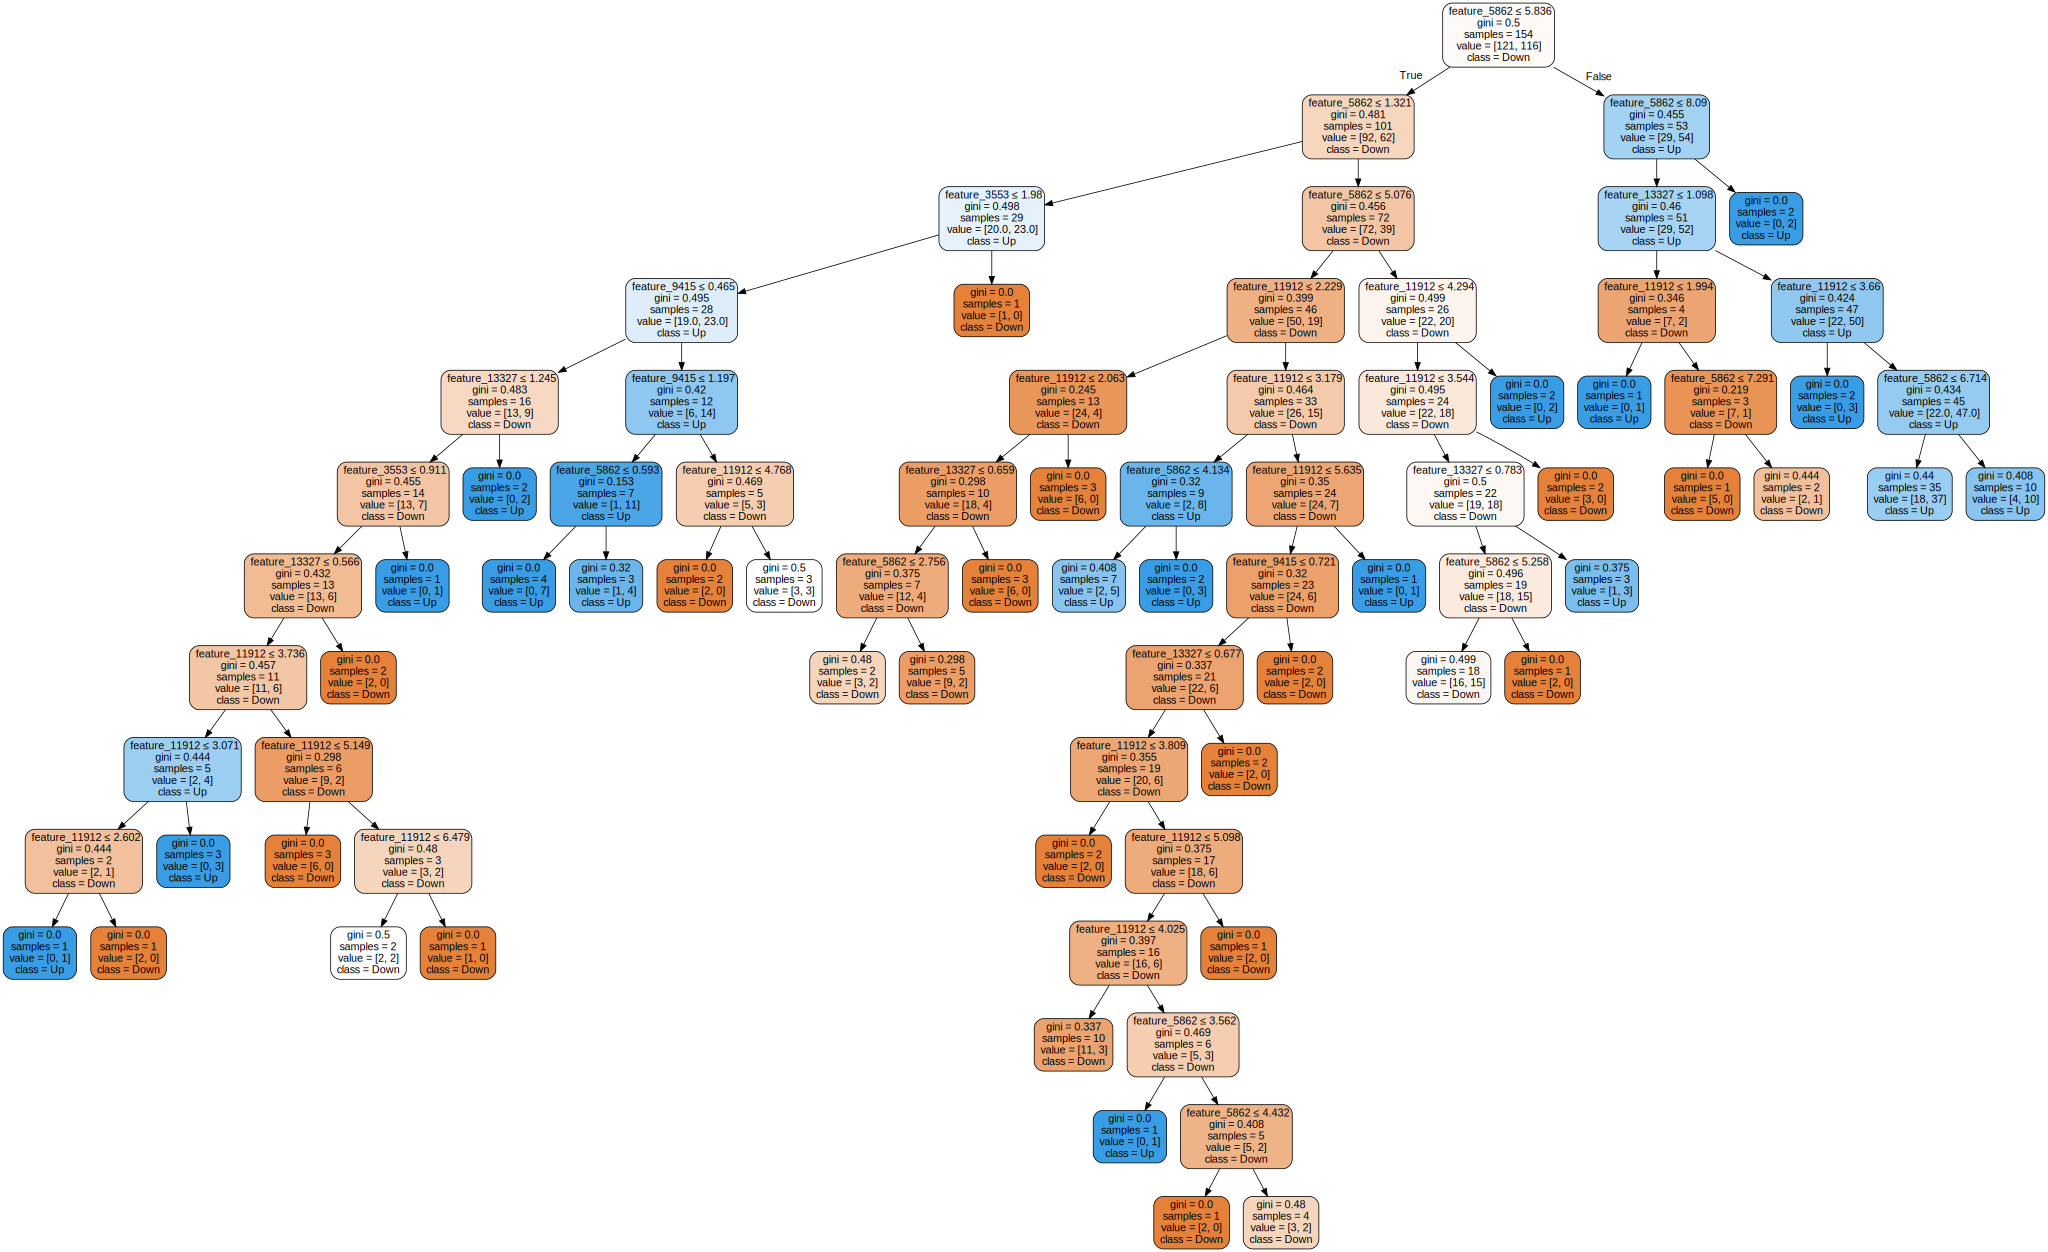

In [77]:
# ------------------------------------------------------------------------
# 6. Display Feature Importances
# ------------------------------------------------------------------------
importances = clf.feature_importances_
feature_names = X.columns

imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("Feature Importances (Random Forest):")
print(imp_df)

# ------------------------------------------------------------------------
# 7. (Optional) Visualize a Single Tree in the Forest
# ------------------------------------------------------------------------
from sklearn.tree import export_graphviz
import graphviz

# Grab one tree from the forest
one_tree = clf.estimators_[0]

dot_data = export_graphviz(
    one_tree,
    out_file=None,
    feature_names=feature_names,
    class_names=['Down','Up'],  # Assuming 0=Down,1=Up
    filled=True, rounded=True,
    special_characters=True
)

# Render in Jupyter/Colab
graph = graphviz.Source(dot_data, format="png")
graph
# If needed, you can save it: graph.render("SAE_forest_tree")